# randomizing the phase of an image

## load image

In [1]:

from skimage import data, color
from skimage.transform import rescale, resize, downscale_local_mean

image = color.rgb2gray(data.astronaut())

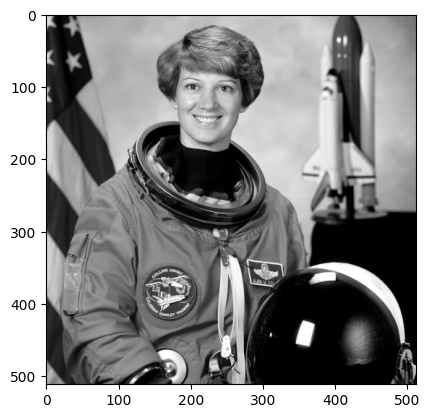

In [2]:
import matplotlib.pyplot as plt
plt.imshow(image, cmap=plt.gray());

In [3]:
type(image)

numpy.ndarray

In [4]:
image.shape

(512, 512)


## computing the Fourier transform

In [5]:
from scipy import fft
F2D = fft.rfft2(image, s=None, norm=None)
F2D.shape

(512, 257)

In [6]:
fft.rfft2?

Signature:     
fft.rfft2(
    x,
    s=None,
    axes=(-2, -1),
    norm=None,
    overwrite_x=False,
    workers=None,
    *,
    plan=None,
)
Call signature: fft.rfft2(*args, **kwargs)
Type:           _Function
String form:    <uarray multimethod 'rfft2'>
File:           /usr/local/lib/python3.10/site-packages/scipy/fft/_basic.py
Docstring:     
Compute the 2-D FFT of a real array.

Parameters
----------
x : array
    Input array, taken to be real.
s : sequence of ints, optional
    Shape of the FFT.
axes : sequence of ints, optional
    Axes over which to compute the FFT.
norm : {"backward", "ortho", "forward"}, optional
    Normalization mode (see `fft`). Default is "backward".
overwrite_x : bool, optional
    If True, the contents of `x` can be destroyed; the default is False.
    See :func:`fft` for more details.
workers : int, optional
    Maximum number of workers to use for parallel computation. If negative,
    the value wraps around from ``os.cpu_count()``.
    See :func:`~


## random phases and the complex spectrum

In [7]:
import numpy as np
phase = 2 * np.pi * np.random.rand(F2D.shape[0], F2D.shape[1])

In [8]:
F_random = np.exp(1j * phase)
Fz_scrambled = F_random * F2D

In [9]:
type(Fz_scrambled)

numpy.ndarray

In [10]:
Fz_scrambled

array([[-1.07459880e+05+4.32998003e+04j, -5.03340822e+03-3.28532987e+03j,
        -6.58149363e+03+2.98735845e+03j, ...,
        -2.17844041e+01-1.27243152e+01j,  3.62442635e+01-3.77078928e+01j,
         1.27268916e+01-8.20308764e+00j],
       [ 9.33049735e+03+1.63179296e+04j, -3.77741185e+02-8.64738668e+03j,
         4.70382198e+02+9.59409676e+03j, ...,
         2.47227448e+01+3.05328509e-01j,  2.90997815e+01-6.67036414e+01j,
         1.01830590e+01+4.50844590e+01j],
       [-6.40978399e+03-2.05424739e+03j, -3.84778875e+03+1.45639322e+03j,
         2.53671038e+03+3.05456545e+03j, ...,
        -4.37184860e+00+1.50160587e+01j,  7.15896263e+00+1.97676504e+01j,
        -3.76327387e+00+1.80992683e+01j],
       ...,
       [-7.85834732e+03+4.30408445e+02j,  6.33522069e+03-7.56207903e+03j,
        -2.25802182e+03-1.30592951e+03j, ...,
         1.77995540e+01+3.17668002e+01j,  3.68528240e+01-4.49740852e+01j,
         2.51387801e+01-1.50697208e+01j],
       [-3.82457942e+03-5.53875938e+03j, -2.

In [11]:
Fz_scrambled.real

array([[-1.07459880e+05, -5.03340822e+03, -6.58149363e+03, ...,
        -2.17844041e+01,  3.62442635e+01,  1.27268916e+01],
       [ 9.33049735e+03, -3.77741185e+02,  4.70382198e+02, ...,
         2.47227448e+01,  2.90997815e+01,  1.01830590e+01],
       [-6.40978399e+03, -3.84778875e+03,  2.53671038e+03, ...,
        -4.37184860e+00,  7.15896263e+00, -3.76327387e+00],
       ...,
       [-7.85834732e+03,  6.33522069e+03, -2.25802182e+03, ...,
         1.77995540e+01,  3.68528240e+01,  2.51387801e+01],
       [-3.82457942e+03, -2.39175457e+03,  3.45451386e+03, ...,
         2.51134343e+00, -1.63608536e+01,  1.06828480e+01],
       [-4.09090871e+03,  1.15297606e+04, -1.36380157e+03, ...,
         2.39353687e+01, -5.34800272e+01, -8.70466364e+00]])

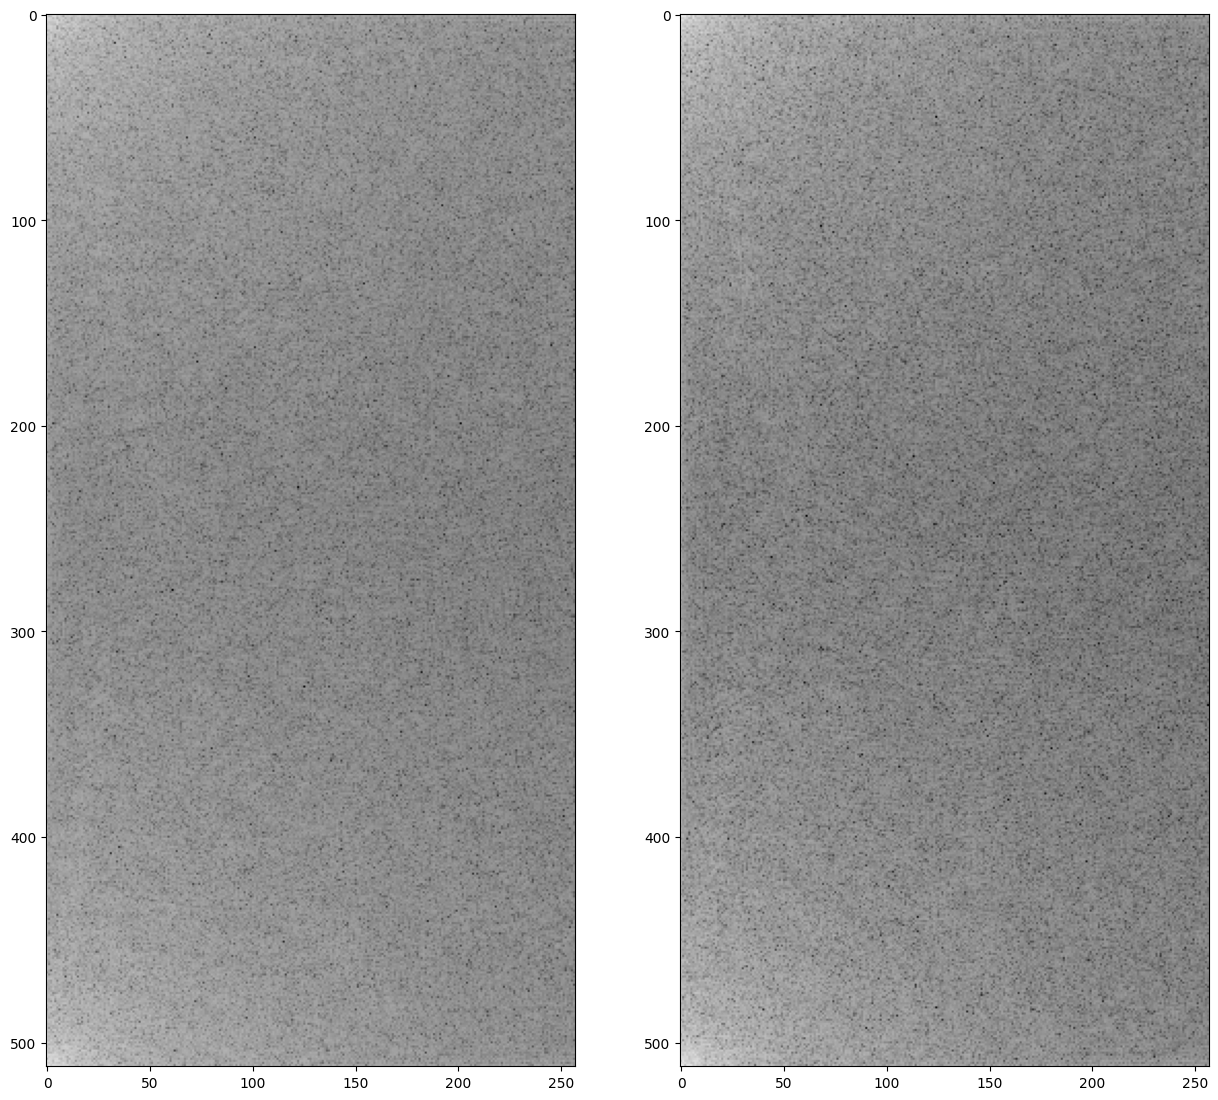

In [12]:
fig, axs = plt.subplots(1,2, figsize=(15, 15))
axs[0].imshow(np.log(np.absolute(Fz_scrambled.real)))
axs[1].imshow(np.log(np.absolute(Fz_scrambled.imag)))


## reconstructing the image

In [13]:
fft.irfft2?

Signature:     
fft.irfft2(
    x,
    s=None,
    axes=(-2, -1),
    norm=None,
    overwrite_x=False,
    workers=None,
    *,
    plan=None,
)
Call signature: fft.irfft2(*args, **kwargs)
Type:           _Function
String form:    <uarray multimethod 'irfft2'>
File:           /usr/local/lib/python3.10/site-packages/scipy/fft/_basic.py
Docstring:     
Computes the inverse of `rfft2`

Parameters
----------
x : array_like
    The input array
s : sequence of ints, optional
    Shape of the real output to the inverse FFT.
axes : sequence of ints, optional
    The axes over which to compute the inverse fft.
    Default is the last two axes.
norm : {"backward", "ortho", "forward"}, optional
    Normalization mode (see `fft`). Default is "backward".
overwrite_x : bool, optional
    If True, the contents of `x` can be destroyed; the default is False.
    See :func:`fft` for more details.
workers : int, optional
    Maximum number of workers to use for parallel computation. If negative,
    the

In [14]:
image_rec = fft.irfft2(F2D)
type(image_rec), image_rec.shape

(numpy.ndarray, (512, 512))

l'image est parfaitement reconstruite d'après les coeffs de Fourier:

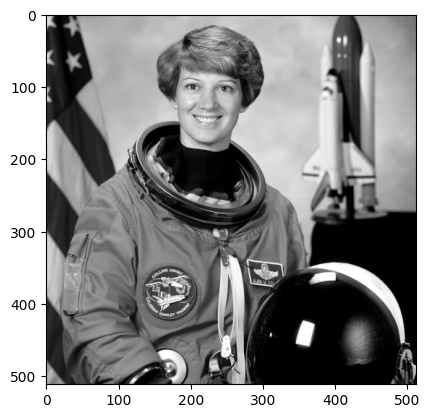

In [15]:
plt.imshow(image_rec, cmap=plt.gray());

In [16]:
image_phase = fft.irfft2(Fz_scrambled)
type(image_phase), image_phase.shape

(numpy.ndarray, (512, 512))

et devient une texture si on randomise les phases

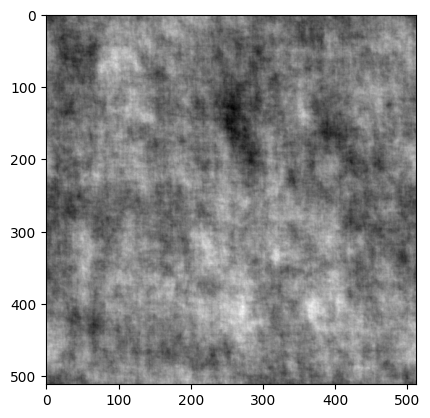

In [17]:
plt.imshow(image_phase, cmap=plt.gray());